# Yukawa-Tsuno Example
Let us explore an example of Yukawa-Tsuno LFER plots using a literature example. This *Jupyter* notebook provides the calculations used in the discussion.  Let us see if we agree with the conclusions of the authors.

"Substituent Effects in the Acid-Catalyzed Hydrolysis of Cyclic Acetals of Benzophenones",
Ueno Shinya, Oshima Takumi, and Nagai Toshikazu,
*Bulletin of the Chemical Society of Japan*, **1986**, *59*, 305-306 
https://www.journal.csj.jp/doi/10.1246/bcsj.59.305

## Setup Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_14/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

sigmatype = "s_plus"          # sigmatype can be one of ["sigma", "s_plus", "s_minus"]


#################################################################
### a function to fill in sigma for empty spaces in s+ and s- ###
#################################################################

def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)

## Read in Data Table
here the data table for Hammett substitutent constants is read in and processed.

In [2]:
### FIRST READ IN DATA TABLE OF SIGMA VALUES

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

LFER_file = "LFER_HanschLeoTaft.csv"

df = pd.read_csv(github_data_location + LFER_file + github_download, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

########################################################
### Fill across sigma values and select substituents ###
########################################################

data_set = fill_sigma(df)

### Remove unneeded columns
data_set.drop(labels = ["TABLE V", "TABLE I"], axis = 1, inplace = True)

data_set.sort_values(by=['sigma'], inplace=True)

print(data_set)

             sigma  s_plus  s_minus
Substituent                        
p-N(CH3)2    -0.83   -1.70    -0.12
p-NH2        -0.66   -1.30    -0.15
p-OH         -0.37   -0.92    -0.37
p-OCH3       -0.27   -0.78    -0.26
p-OEt        -0.24   -0.81    -0.28
p-CMe3       -0.20    0.26    -0.13
p-CH3        -0.17   -0.31    -0.17
m-NH2        -0.16   -0.16    -0.16
p-Et         -0.15   -0.30    -0.19
m-N(CH3)2    -0.15   -0.15    -0.15
m-CMe3       -0.10   -0.10    -0.10
m-Et         -0.07   -0.07    -0.07
m-CH3        -0.07   -0.07    -0.07
p-OC6H5      -0.03   -0.50    -0.10
p-C6H5       -0.01    0.02    -0.18
H             0.00    0.00     0.00
p-CCCH3       0.03   -0.26    -0.13
p-CHCH2       0.04   -0.16     0.04
m-CHCH2       0.06    0.06     0.06
m-C6H5        0.06    0.06     0.06
p-F           0.06   -0.07    -0.03
p-N3          0.08    0.08     0.11
m-OEt         0.10    0.10     0.10
m-OH          0.12    0.12     0.12
m-OCH3        0.12    0.12     0.12
p-I           0.18    0.14  

## Read Data
Here the data from the publication is read in. It had been saved in a csv file.

In [3]:
############################################
### Read in data from literature example ###
############################################

df = pd.read_csv("NagaiData.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 
print(df)

             10^4*k_obs
Substituent            
p-OCH3          51.0000
p-CH3           17.1000
m-CH3            6.9600
p-C6H5           4.9900
H                1.3600
p-Cl             1.1300
m-Cl             0.3110
m-NO2            0.0396


## Process Data
The calculations and cross refernces to build the final data table are made. The log of the rate constants are calculated abd the corresponding values for substituent constants are included from the Hammett data table.

In [4]:
#################################################################
### calculate log(k) and impoirt sigma values from data table ###
#################################################################

df["logk"]=np.log10(df["10^4*k_obs"]/10**4)

df["sigma"] =   data_set["sigma"]
df["s_plus"] =  data_set["s_plus"]
df["s_minus"] = data_set["s_minus"]

#df.dropna(inplace=True)
print(df)

             10^4*k_obs      logk  sigma  s_plus  s_minus
Substituent                                              
p-OCH3          51.0000 -2.292430  -0.27   -0.78    -0.26
p-CH3           17.1000 -2.767004  -0.17   -0.31    -0.17
m-CH3            6.9600 -3.157391  -0.07   -0.07    -0.07
p-C6H5           4.9900 -3.301899  -0.01    0.02    -0.18
H                1.3600 -3.866461   0.00    0.00     0.00
p-Cl             1.1300 -3.946922   0.23    0.11     0.19
m-Cl             0.3110 -4.507240   0.37    0.37     0.37
m-NO2            0.0396 -5.402305   0.71    0.71     0.71


## Select Data Series for Plot
below the x and y values to plot are selected. The x values are the Yukawa-Tsuno $\sigma$ values using the optimized value for $r$ that is determined in the sections below. Also selected were alternate x values (x1 and x2) to plot the unaltered $\sigma$ and $\sigma^+$ values on the plot as well.

The plotting code that follows was altered to add in the plots for the x1 and x2 series.

In [5]:
#####################################################
### Get series of data to plot from the dataframe ###
#####################################################


x = df["sigma"]+0.325*(df["s_plus"]-df["sigma"])
y=  df["logk"]
x1 = df["s_plus"]
x2 = df["sigma"]

## Plot Code
Here is my standard plotting code. It was slightly altered to suit this situation.

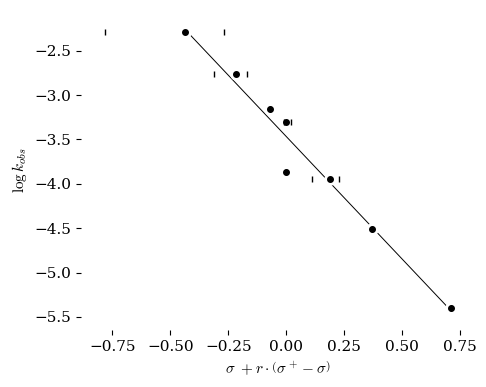

slope = -2.7602
intercept = -3.466
RSQ = 0.968935


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################


style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"
plt.style.use(github_styles_location + style_file + github_download)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################


    
#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="black", zorder=3)

ax.scatter(x1,y, s=64, marker="|", color="white", zorder=2)
ax.scatter(x1,y, s=16, marker="|", color="k", zorder=3)

ax.scatter(x2,y, s=64, marker="|", color="white", zorder=2)
ax.scatter(x2,y, s=16, marker="|", color="k", zorder=3)


if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(x,y)
    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='black', zorder=1, linewidth=0.7)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=r"$\sigma~+ r\cdot\left(\sigma^+-\sigma \right)$")


############################
### Print labels on plot ###
############################

if False:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,                    # this is the text for each label
                 (x_loc,y_loc),              # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),             # distance from text to points (x,y)
                 ha='left')                  # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

#fig.savefig("plot2.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


#####################################
### Print the line fit parameters ###
#####################################

if True:         # Change to True to print a linear line fit results
    print(f"slope = {linfit.slope:0.4f}")
    print(f"intercept = {linfit.intercept:0.3f}")
    print(f"RSQ = {(linfit.rvalue**2):0.6f}")


## Optimize the Yukawa-Tsuno $r$ Value
The r value can be optimized by minimizing for the line fit RSQ value. the `scipy.optimize.minimize_scalar` function was used. For simple functions it should work well. I also plotted the RSQ value as r was varied to make sure that the answer made sense. It is observed that the Yukawa-Tsuno $r$-value that resulted in the best line fit was $0.325$. When that value is used, the curve fit has a RSQ value of 0.969 and a slope of $-2.8$.  The authors obtained values of $r=0.385$ with a slope of $-2.9$. They very likely used slightly different $\sigma$ values in their calculations

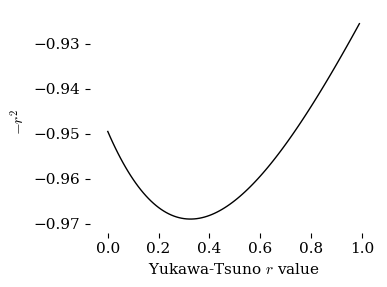

The optimal value for r is 0.325 for rsq = -0.96893


In [7]:
from scipy.optimize import minimize_scalar

def RSQ_function(r):    # returns the RSQ for linefits using the given Yukawa-Tsuno r factor
    x = df["sigma"]+r*(df["s_plus"]-df["sigma"])
    linfit = linregress(x,y)
    return -(linfit.rvalue**2)


##########################################################
### Plot the value of -RSQ as the value of r is varied ###
##################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"
plt.style.use(github_styles_location + style_file + github_download)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
ax.set(ylabel=r"$-r^2$", 
       xlabel=r"Yukawa-Tsuno $r$ value")

rsq_range=[]
r_range = np.arange(0,1,0.01)
for r in r_range:
    rsq = RSQ_function(r)
    rsq_range.append(rsq)
    
ax.plot(r_range,rsq_range)

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()

##################################################
### Determine optimal r value to minimize -RSQ ###
##################################################

r_opt = minimize_scalar(RSQ_function)
print(f"The optimal value for r is {r_opt['x']:0.3f} for rsq = {r_opt['fun']:0.5f}")


## A Note on Documentation
I hope that you can observe how the optimization was performed to minimize the RSQ as we varied the YK $r$-value. Minimizing RSQ may not be the best way to do this. Perhaps there are better ways. But at least you can see EXACTLY what I did.

Note that the authors of the paper do not list the exact $\sigma$ values they used for their plots. Nor is there a refernce to a source. I assume they used the standard Hammett and Brown-Okamoto values available at the time. There is also NO INFORMATION on the method used to obtain the optimal $r$-value. Did they use a minimization method targetting the RSQ value? Did they use another statistical score for quality-of-fit as the target? There is no supplemental information archived with the paper so we can only trust the authors analysis.

Or we can repeat the anaysis using their data and document the process in a Jupyter notebook. Now everyone can see every step that was taken and evaluate the conclusions properly.